Importing the Libraries

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Preprocessing the Training Image

In [24]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

train_set = train_generator.flow_from_directory(
    directory="cardiomegaly/train/train/",
    target_size=(64,64),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 4438 images belonging to 2 classes.


In [25]:
print(train_set.class_indices)

{'false': 0, 'true': 1}


Processing the Test Images

In [26]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

test_set = test_generator.flow_from_directory(
    directory="cardiomegaly/test/test",
    batch_size=64,
    target_size=(64,64),
    color_mode="grayscale",
    class_mode="categorical"
    
)

Found 1114 images belonging to 2 classes.


Building the Convolution Neural Network

In [27]:
cnn_model = tf.keras.models.Sequential()

Adding the first Convolution and Pooling layer

In [28]:
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape = (64,64,1)))
cnn_model.add(tf.keras.layers.MaxPool2D())


Adding the second Convolution and Pooling layer

In [29]:
cnn_model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu"))
cnn_model.add(tf.keras.layers.MaxPool2D())


Adding the third Convolution and Pooling Layer

In [30]:
cnn_model.add(tf.keras.layers.Conv2D(filters=12,kernel_size=(3,3),activation="relu"))
cnn_model.add(tf.keras.layers.MaxPool2D())


In [31]:
cnn_model.add(tf.keras.layers.Flatten())

In [32]:
cnn_model.add(tf.keras.layers.Dense(units = 144,activation="relu"))

cnn_model.add(tf.keras.layers.Dense(units = 2,activation="softmax"))


In [33]:
cnn_model.compile(loss = "binary_crossentropy",optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),metrics=["accuracy"])

In [34]:
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 12)        1740      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 12)         

In [35]:
history = cnn_model.fit(x = train_set,validation_data=test_set,epochs=30)

Epoch 1/30
 1/70 [..............................] - ETA: 21s - loss: 0.6887 - accuracy: 0.5625

2023-07-15 12:49:58.203277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5261

2023-07-15 12:50:00.007832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 2s 30ms/step - loss: 0.6918 - accuracy: 0.5261 - val_loss: 0.6893 - val_accuracy: 0.5871
Epoch 2/30
70/70 [==============================] - 2s 27ms/step - loss: 0.6865 - accuracy: 0.5559 - val_loss: 0.6840 - val_accuracy: 0.5153
Epoch 3/30
70/70 [==============================] - 2s 27ms/step - loss: 0.6778 - accuracy: 0.5802 - val_loss: 0.6646 - val_accuracy: 0.6652
Epoch 4/30
70/70 [==============================] - 2s 27ms/step - loss: 0.6630 - accuracy: 0.6115 - val_loss: 0.6436 - val_accuracy: 0.6499
Epoch 5/30
70/70 [==============================] - 2s 28ms/step - loss: 0.6474 - accuracy: 0.6318 - val_loss: 0.6278 - val_accuracy: 0.6364
Epoch 6/30
70/70 [==============================] - 2s 28ms/step - loss: 0.6412 - accuracy: 0.6320 - val_loss: 0.6214 - val_accuracy: 0.6454
Epoch 7/30
70/70 [==============================] - 2s 27ms/step - loss: 0.6367 - accuracy: 0.6334 - val_loss: 0.6177 - val_accuracy: 0.6670
Epoch 8/30
70/70 [======

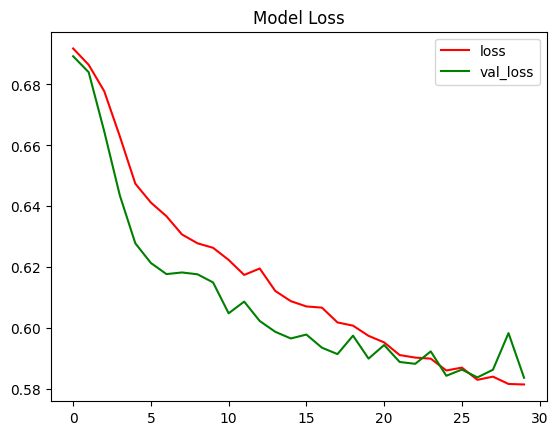

In [36]:
plt.plot(history.history["loss"],color = "red")
plt.plot(history.history["val_loss"],color = "green")
plt.title("Model Loss")
plt.legend(["loss","val_loss"])
plt.show()

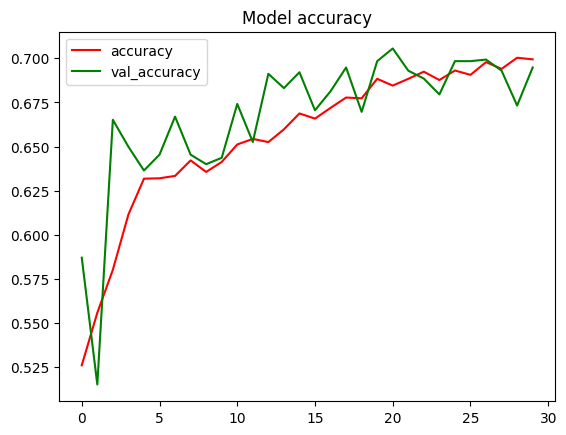

In [37]:
plt.plot(history.history["accuracy"],color = "red")
plt.plot(history.history["val_accuracy"],color = "green")
plt.title("Model accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

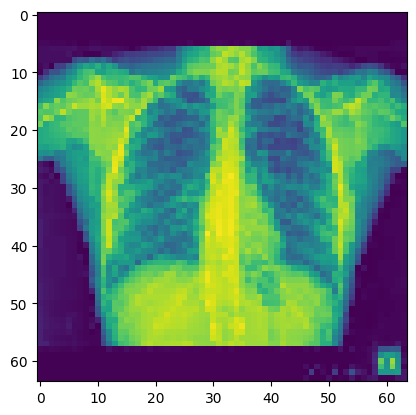

In [69]:
new_model = tf.keras.models.load_model("cardiomegaly_saved_model.h5")

img_path = "/Users/srujanmuralidhar/Downloads/download (1).jpeg"
test_image = image.load_img(img_path,target_size=(64,64),color_mode="grayscale")
plt.imshow(test_image,)

test_img = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)


In [70]:
prediction = new_model.predict(test_image)


1/1 [==============================] - 0s 52ms/step


2023-07-15 18:08:39.297675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [71]:
print(test_set.class_indices)

{'false': 0, 'true': 1}


In [72]:

print(prediction)
print(np.argmax(prediction))

[[1. 0.]]
0
